In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense 
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import requests
from bs4 import BeautifulSoup

In [10]:
#삼성 코드 005930
#date 부터 오늘까지 주가 긁어오는 함수
def parse_to_df(code,date):
    page = 1
    while True: 
        url = f'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'
        req = requests.get(url) 
        #html 구문에 맞게 텍스트를 읽는다
        bs = BeautifulSoup(req.text, "html.parser")
        print(f'page {page}')
        try : 
            #read_html은 html에서 표를 가져온다
            #0 번째 인덱스를 넣는게 의미가 없어 보일 수 있어도 
            #dataframe이 리스트에 감싸져 나오기 때문에 한 요소만 선택
            table = pd.read_html(str(bs.find('table',{'class':"type2"})))[0] 
            
            #첫페이지일 경우 table을 깊은 복사
            if page == 1:
                df = table.dropna().copy()    
                print('copy dataframe')
            #table을 df에 추가
            else : 
                df = pd.concat([df,table.dropna()])  
                print('concate dataframe')
        except Exception as e :
            print(e)   

        #breaking point date ~ 오늘까지만 남김
        if int(str(df.iloc[-1][0]).replace('.',''))  < int(date) :
            date = date[:4]+'.'+date[4:6]+'.'+date[6:]
            df = df[df['날짜']>= date]  
            print('break')
            break
        page += 1  
    #영어로 column 명 바꿈
    df.columns = ["Date","Close", 'YtT','Market Cap','High','Low','Volume' ]
    return df 

date,code =  input('시작일) YYYYMMDD   code:').split()
df = parse_to_df(code,date)

시작일) YYYYMMDD   code:20100101 005930
page 1
copy dataframe
page 2
concate dataframe
page 3
concate dataframe
page 4
concate dataframe
page 5
concate dataframe
page 6
concate dataframe
page 7
concate dataframe
page 8
concate dataframe
page 9
concate dataframe
page 10
concate dataframe
page 11
concate dataframe
page 12
concate dataframe
page 13
concate dataframe
page 14
concate dataframe
page 15
concate dataframe
page 16
concate dataframe
page 17
concate dataframe
page 18
concate dataframe
page 19
concate dataframe
page 20
concate dataframe
page 21
concate dataframe
page 22
concate dataframe
page 23
concate dataframe
page 24
concate dataframe
page 25
concate dataframe
page 26
concate dataframe
page 27
concate dataframe
page 28
concate dataframe
page 29
concate dataframe
page 30
concate dataframe
page 31
concate dataframe
page 32
concate dataframe
page 33
concate dataframe
page 34
concate dataframe
page 35
concate dataframe
page 36
concate dataframe
page 37
concate dataframe
page 38
conca

In [76]:
df.tail()

,Date,Close,YtT,Market Cap,High,Low,Volume
5,2010.01.08,821000.0,8000.0,820000.0,821000.0,806000.0,295798.0
9,2010.01.07,813000.0,28000.0,841000.0,841000.0,813000.0,443237.0
10,2010.01.06,841000.0,19000.0,829000.0,841000.0,826000.0,459755.0
11,2010.01.05,822000.0,13000.0,826000.0,829000.0,815000.0,559219.0
12,2010.01.04,809000.0,10000.0,803000.0,809000.0,800000.0,239271.0


In [12]:
#df 를 csv로 저장
df.to_csv(f'./{code}_crawling.csv', sep=',',index=False)

In [70]:
data = pd.read_csv(f'./{code}_crawling.csv')
data

,Date,Close,YtT,Market Cap,High,Low,Volume
0,2020.08.11,58200.0,400.0,58000.0,59500.0,57800.0,24757552.0
1,2020.08.10,57800.0,300.0,57600.0,58300.0,57500.0,17774291.0
2,2020.08.07,57500.0,500.0,57900.0,58400.0,57100.0,18751717.0
3,2020.08.06,58000.0,1100.0,57100.0,58400.0,57100.0,21625874.0
4,2020.08.05,56900.0,400.0,57300.0,57500.0,56300.0,17739706.0
...,...,...,...,...,...,...,...
2614,2010.01.08,821000.0,8000.0,820000.0,821000.0,806000.0,295798.0
2615,2010.01.07,813000.0,28000.0,841000.0,841000.0,813000.0,443237.0
2616,2010.01.06,841000.0,19000.0,829000.0,841000.0,826000.0,459755.0
2617,2010.01.05,822000.0,13000.0,826000.0,829000.0,815000.0,559219.0


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Close', 'YtT', 'Market Cap', 'High', 'Low', 'Volume']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

TEST_SIZE = 200
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

         Close       YtT  Market Cap      High       Low    Volume
0     0.007349  0.002837    0.020174  0.020688  0.020366  0.389937
1     0.007207  0.002128    0.020035  0.020271  0.020261  0.279949
2     0.007101  0.003546    0.020139  0.020306  0.020120  0.295344
3     0.007278  0.007801    0.019861  0.020306  0.020120  0.340613
4     0.006888  0.002837    0.019930  0.019993  0.019838  0.279405
...        ...       ...         ...       ...       ...       ...
2614  0.277505  0.056738    0.285217  0.285466  0.284003  0.004659
2615  0.274672  0.198582    0.292522  0.292420  0.286469  0.006981
2616  0.284589  0.134752    0.288348  0.292420  0.291050  0.007241
2617  0.277859  0.092199    0.287304  0.288248  0.287174  0.008808
2618  0.273255  0.070922    0.279304  0.281293  0.281889  0.003769

[2619 rows x 6 columns]


In [77]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [99]:
feature_cols = ['YtT', 'Market Cap', 'High', 'Low', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

print(x_train.shape,y_train.shape, x_valid.shape, y_valid.shape)

test_feature = test[feature_cols]
test_label = test[label_cols]

x_test, y_test = make_dataset(test_feature, test_label, 20)

print(x_test.shape, y_test.shape)

(1919, 20, 5) (1919, 1) (480, 20, 5) (480, 1)
(180, 20, 5) (180, 1)


In [103]:
model = Sequential()

#seq_len개 데이터가 들어감 각 seq 에서 아웃풋 냄
model.add(LSTM(128, return_sequences=True, input_shape=(20,5)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 20, 128)           68608     
_________________________________________________________________
dropout_19 (Dropout)         (None, 20, 128)           0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)              

In [104]:
from datetime import datetime

start_time = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train,
    validation_data=(x_valid,y_valid),
    batch_size=32,
    epochs=20,
    callbacks=[
        TensorBoard(log_dir='logs/%s' % (start_time)),
        #epoch마다 가중치를 저장하는데 /val_loss 가 좋을 때만
        ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        #AttributeError: 'Sequential' object has no attribute '_get_distribution_strategy'
        #val_loss 기준 / callback되면 학습률 0.2 / patience epoch 6 동안 기다렸다가 callback
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=2, mode='auto')
])

Epoch 1/20
57/60 [===========================>..] - ETA: 0s - loss: 0.0219
Epoch 00001: val_loss improved from inf to 0.00992, saving model to ./models/2020_08_11_17_57_51_eth.h5
60/60 [==============================] - 2s 30ms/step - loss: 0.0213 - val_loss: 0.0099 - lr: 0.0010
Epoch 2/20
60/60 [==============================] - ETA: 0s - loss: 0.0078
Epoch 00002: val_loss improved from 0.00992 to 0.00696, saving model to ./models/2020_08_11_17_57_51_eth.h5
60/60 [==============================] - 1s 17ms/step - loss: 0.0078 - val_loss: 0.0070 - lr: 0.0010
Epoch 3/20
60/60 [==============================] - ETA: 0s - loss: 0.0057
Epoch 00003: val_loss did not improve from 0.00696
60/60 [==============================] - 1s 17ms/step - loss: 0.0057 - val_loss: 0.0126 - lr: 0.0010
Epoch 4/20
59/60 [============================>.] - ETA: 0s - loss: 0.0047
Epoch 00004: val_loss did not improve from 0.00696
60/60 [==============================] - 1s 18ms/step - loss: 0.0050 - val_loss: 0.

In [105]:
loss = model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 6ms/step - loss: 2.6270e-04


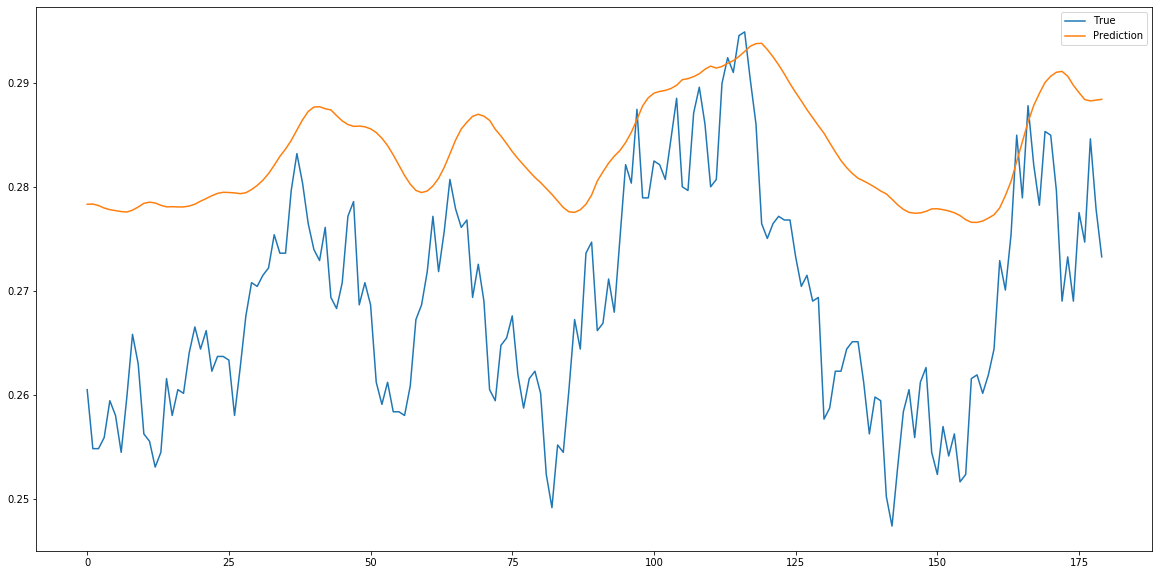

In [109]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()